# Set up the project

### Preparation
First, I need to fill the tables with some data. The ER diagram from my database is as follows.

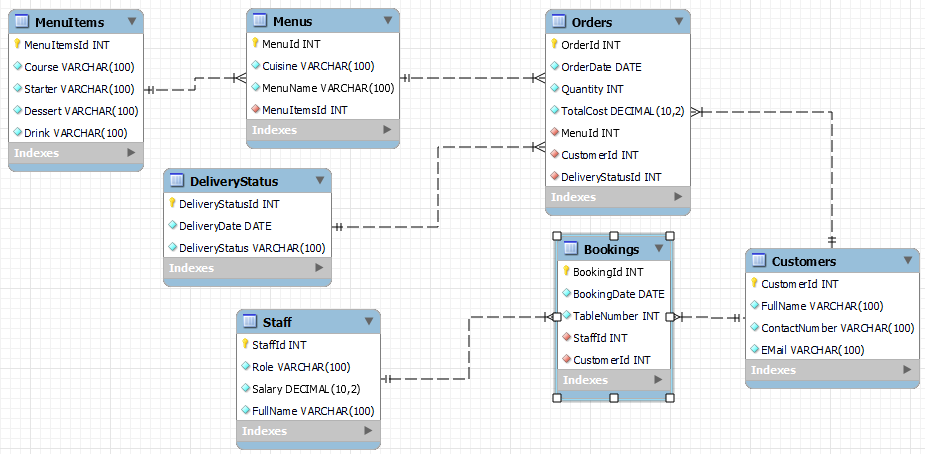





### SQL Script for populating tables

```
USE `littlelemondb`;
SHOW TABLES FROM `littlelemondb`;

# Populating menuitems table
INSERT INTO `menuitems` (MenuItemsId, Course, Starter, Dessert, Drink) VALUES 
(1, 'La Italian pasta', 'Bread sticks', 'Macarroni', 'Jamaica'),
(2, 'Le Greek salad', 'Fruit combination', 'Profiterol', 'Horchata'),
(3, 'La Japanese sushi', 'Soya beens', 'Bowl cake', 'Sake'),
(4, 'Le American sandwidth', 'Fries with cheese', 'Cheese PIe', 'Ice tea'),
(5, 'La Mexican taco', 'Crunchy cacahuates', 'Platanitos', 'Tepache'),
(6, 'Le Carnes brasil', 'Salad banana', 'Fried cheese', 'Monji'),
(7, 'La Merequente chinese', 'RIce rolls', 'Jolitas cukitas', 'Green tea');
COMMIT;
SELECT * FROM `menuitems`;

# Populating menu table
INSERT INTO `menus` (MenuId, Cuisine, MenuName, MenuItemsId) VALUES 
(1, 'Italian', 'La Italian Dancer', 1),
(2, 'Greek', 'Le Greek Dance', 2),
(3, 'Japanese', 'La Japonais Saks', 3),
(4, 'American', 'Le American Mix', 4),
(5, 'Mexican', 'Le Mexican Mariachi', 5),
(6, 'Brasilian', 'Le Brasilian Parrilla', 6),
(7, 'Chinese', 'Le Chinese Pleasure', 7);
COMMIT;
SELECT * FROM `menus`;

# Populating deliverystatus table
INSERT INTO `deliverystatus` (DeliveryStatusId, DeliveryDate, DeliveryStatus) VALUES 
(1, '2023-01-01', 'Yes'),
(2, '2023-02-02', 'No'),
(3, '2023-03-03', 'Cancel'),
(4, '2023-04-04', 'Yes'),
(5, '2023-05-05', 'No'),
(6, '2023-06-06', 'Yes'),
(7, '2023-07-07', 'In Progress');
COMMIT;
SELECT * FROM `deliverystatus`;

# Populating staff table
INSERT INTO `staff` (StaffId, Role, Salary, FullName) VALUES 
(1, 'Manager', 5000.50, 'John Bolas'),
(2, 'Waiter', 2000.10, 'Peter Papitas'),
(3, 'Cashier', 7000.30, 'Mary Fresas'),
(4, 'Bar tender', 4000.40, 'Sobrio Morales'),
(5, 'Waiter', 3000.00, 'Pablo Gold'),
(6, 'Host', 4000.00, 'Linda Clark'),
(7, 'Waiter', 2800.00, 'Sandra Bayron');
COMMIT;
SELECT * FROM `staff`;

# Populating customers table
INSERT INTO `customers` (CustomerId, FullName, ContactNumber, Email) VALUES 
(1, 'Nachito Bendito', '111-111', 'machome@bull.net'),
(2, 'Petrita Bonita', '222-222', 'pierahug@salta.com'),
(3, 'Marquino Lucious', '333-333', 'moriskt@anont.edu'),
(4, 'Polinesio Birch', '444-444', 'poriscas@corse.com'),
(5, 'Carambolas', '555-555', 'corderito@juanbugo.org'),
(6, 'Juan Camaney', '666-666', 'johnybello@acme.com'),
(7, 'Tuto Mondo', '777-777', 'mondovir@patito.edu');
COMMIT;
SELECT * FROM `customers`;

# Populating bookings table
INSERT INTO `bookings` (BookingId, BookingDate, TableNumber, StaffId, CustomerId) VALUES
(1, '2023-01-01', 1, 1, 1),
(2, '2023-02-02', 2, 2, 2),
(3, '2023-03-03', 3, 3, 3),
(4, '2023-04-04', 4, 4, 4),
(5, '2023-05-05', 5, 5, 5),
(6, '2023-06-06', 6, 6, 6),
(7, '2023-07-07', 7, 7, 7);
COMMIT;
SELECT * FROM `bookings`;

# Populating orders table
INSERT INTO `orders` (OrderId, OrderDate, Quantity, TotalCost, MenuId, CustomerId, DeliveryStatusId) VALUES 
(1, '2023-01-01', 1, 100.00, 1, 1, 1),
(2, '2023-02-02', 2, 200.00, 2, 2, 2),
(3, '2023-03-03', 3, 300.00, 3, 3, 3),
(4, '2023-04-04', 4, 400.00, 4, 4, 4),
(5, '2023-05-05', 5, 500.00, 5, 5, 5),
(6, '2023-06-06', 6, 600.00, 6, 6, 6),
(7, '2023-07-07', 7, 700.00, 7, 7, 7);
COMMIT;
SELECT * FROM `orders`;
```

### Excercise:  Create a virtual table to summarize data

##### Scenario 
Little Lemon needs to retrieve data from their database. You need to:
- Create a virtual table to summarize data.
- Use a JOIN statement to query data from multiple tables.
- Create a SQL statement with a subquery.

##### Task 1
In the first task, Little Lemon need you to create a virtual table called OrdersView that focuses on 
OrderID, Quantity and Cost columns within the Orders table for all orders with a quantity greater than 2. 

```
CREATE VIEW OrdersView AS SELECT OrderId, Quantity, TotalCost FROM `orders` WHERE Quantity > 2;
SELECT * FROM OrdersView;
```

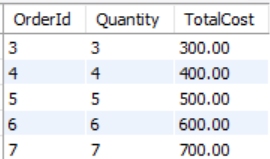

##### Task 2
For your second task, Little Lemon need information from four tables on all customers with orders that cost more than $150. 
Extract the required information from each of the following tables by using the relevant JOIN clause: 
- Customers table: The customer id and full name.
- Orders table: The order id and cost.
- Menus table: The menus name.
- MenusItems table: course name and starter name.
  
The result set should be sorted by the lowest cost amount.

```
SELECT customers.CustomerId AS 'Customer Id', customers.FullName AS 'Full Name', orders.OrderId AS 'Order Id', orders.TotalCost AS Cost, menus.MenuName AS 'Menu Name', menuitems.Course AS 'Course Name'
FROM customers
    INNER JOIN orders
        ON customers.CustomerId = orders.CustomerId
    INNER JOIN menus
        ON orders.MenuId = menus.MenuId
    INNER JOIN menuitems
        ON menus.MenuItemsId = menuitems.MenuItemsId
WHERE orders.TotalCost > 150 ORDER BY Cost ASC;    
```

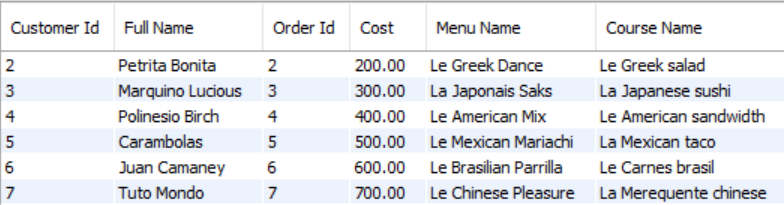

##### Task 3
For the third and final task, Little Lemon need you to find all menu items for which more than 2 orders have been placed. You can carry out this task by creating a subquery that lists the menu names from the menus table for any order quantity with more than 2.

Here’s some guidance around completing this task: 

- Use the ANY operator in a subquery
- The outer query should be used to select the menu name from the menus table.
- The inner query should check if any item quantity in the order table is more than 2. 

The output result of your query (depends on the data populated in your database) should be similar to the following screenshot:

```
SELECT MenuName AS 'Menu Name'
FROM `menus`
WHERE MenuId = ANY (SELECT MenuId FROM `orders` WHERE Quantity > 2);
```

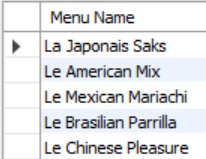

### Excercise: Create optimized queries to manage and analyze data

##### Scenario:
Little Lemon need to query the data in their database. To do this, they need your help with creating optimized queries using stored procedures and prepared statements.

##### Task 1
In this first task, Little Lemon need you to create a procedure that displays the maximum ordered quantity in the Orders table. 

Creating this procedure will allow Little Lemon to reuse the logic implemented in the procedure easily without retyping the same code over again and again to check the maximum quantity. 

You can call the procedure GetMaxQuantity and invoke it as follows:
```
CALL GetMaxQuantity();
```

```
CREATE PROCEDURE GetMaxQuantity()  
SELECT MAX(Quantity) AS 'Max Quantity in Order'
FROM `orders`;

CALL GetMaxQuantity();
```

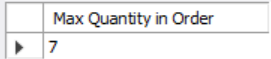

##### Task 2
In the second task, Little Lemon need you to help them to create a prepared statement called GetOrderDetail. This prepared statement will help to reduce the parsing time of queries. It will also help to secure the database from SQL injections.

The prepared statement should accept one input argument, the CustomerID value, from a variable. 

The statement should return the order id, the quantity and the order cost from the Orders table. 

Once you create the prepared statement, you can create a variable called id and assign it value of 1. `

```
PREPARE GetOrderDetail FROM 'SELECT OrderId, Quantity, TotalCost FROM `orders` WHERE OrderId = ?';

SET @id = 1;
EXECUTE GetOrderDetail USING @id;
```

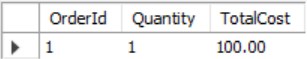

##### Task 3
Your third and final task is to create a stored procedure called CancelOrder. Little Lemon want to use this stored procedure to delete an order record based on the user input of the order id.

Creating this procedure will allow Little Lemon to cancel any order by specifying the order id value in the procedure parameter without typing the entire SQL delete statement.   

```
CREATE PROCEDURE CancelOrder(IN Id INT)
DELETE FROM `orders` WHERE OrderId = Id;

CALL CancelOrder(5);
```

For verification, I can use ```SELECT * FROM `orders`;```

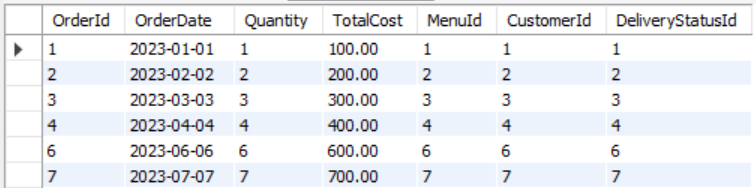

### Exercise: Create SQL queries to check available bookings based on user input

##### Scenario 
Little Lemon’s data model must include a Bookings table so that they can store data for table bookings. They also need a stored procedure that checks available bookings based on user input, and a MySQL transaction that can be used to cancel bookings. Use your knowledge of MySQL to help them out.

##### Task 1
Little Lemon wants to populate the Bookings table of their database with some records of data. Your first task is to replicate the list of records in the following table by adding them to the Little Lemon booking table. 

**NOTE:** I adjusted the numbers of BookingId to avoid conclict with my initial values.

```
INSERT INTO `bookings` (BookingId, BookingDate, TableNumber, StaffId, CustomerId) VALUES
(11, '2022-10-10', 5, 1, 1),
(12, '2022-11-12', 3, 2, 3),
(13, '2022-10-11', 2, 3, 2),
(14, '2022-10-13', 2, 4, 1);
COMMIT;
SELECT * FROM `bookings` WHERE BookingId > 10;
```

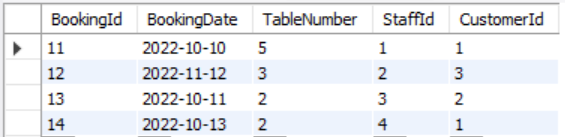

##### Task 2
For your second task, Little Lemon need you to create a stored procedure called CheckBooking to check whether a table in the restaurant is already booked. Creating this procedure helps to minimize the effort involved in repeatedly coding the same SQL statements.

The procedure should have two input parameters in the form of booking date and table number. You can also create a variable in the procedure to check the status of each table.

```
CREATE PROCEDURE CheckBooking(IN Rdate DATE, IN TableN INT)
SELECT BookingId FROM `bookings` WHERE BookingDate = Rdate AND TableNumber = TableN;

CALL CheckBooking("2022-11-12", 3);
```

I check that there is a reservation using BookingId

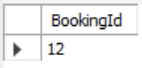

##### Task 3
For your third and final task, Little Lemon need to verify a booking, and decline any reservations for tables that are already booked under another name. 

Since integrity is not optional, Little Lemon need to ensure that every booking attempt includes these verification and decline steps. However, implementing these steps requires a stored procedure and a transaction. 

To implement these steps, you need to create a new procedure called AddValidBooking. This procedure must use a transaction statement to perform a rollback if a customer reserves a table that’s already booked under another name.  

Use the following guidelines to complete this task:

- The procedure should include two input parameters in the form of booking date and table number.
- It also requires at least one variable and should begin with a START TRANSACTION statement.
- Your INSERT statement must add a new booking record using the input parameter's values.
- Use an IF ELSE statement to check if a table is already booked on the given date. 
- If the table is already booked, then rollback the transaction. If the table is available, then commit the transaction.

This is what is expected:

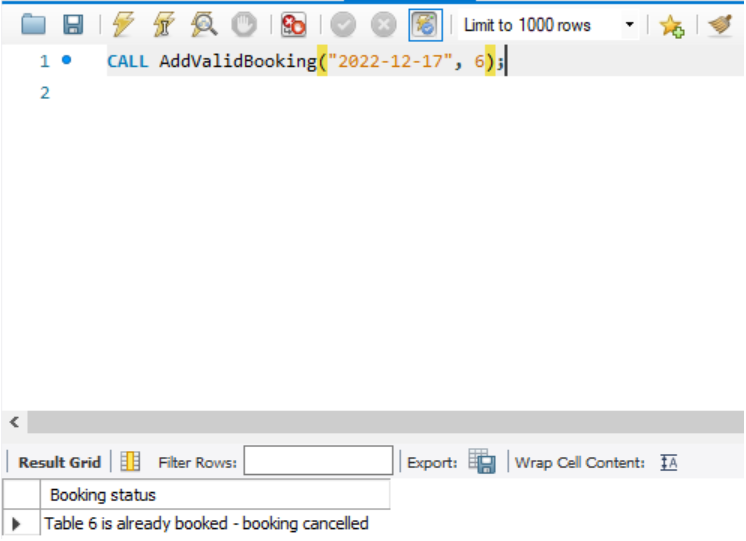

### Exercise: Create SQL queries to add and update bookings

##### Scenario 
Little Lemon needs your help with managing their bookings. They need you to create stored procedures that they can invoke as required to add, update and delete bookings in their database.

##### Task 1

In this first task you need to create a new procedure called AddBooking to add a new table booking record.

The procedure should include four input parameters in the form of the following bookings parameters:

- booking id 
- customer id 
- booking date
- table number

```
DELIMITER //
CREATE PROCEDURE AddBooking(IN bookingId INT, IN tableN INT, IN staffId INT, IN customerId INT, IN bDate DATE)
BEGIN
	INSERT INTO `bookings` (BookingId, BookingDate, TableNumber, StaffId, CustomerId) VALUES 
	(bookingId, bDate, tableN, staffId, customerId);
	COMMIT;
END //
DELIMITER ;

CALL AddBooking(15, 9, 3, 4, "2022-11-12");

SELECT * FROM `bookings` WHERE BookingId > 10;
```

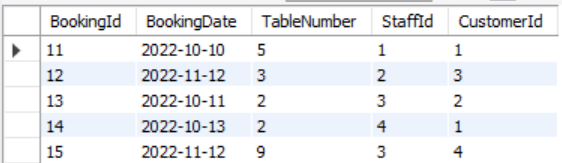

##### Task 2
For your second task, Little Lemon need you to create a new procedure called UpdateBooking that they can use to update existing bookings in the booking table.

The procedure should have two input parameters in the form of booking id and booking date. You must also include an UPDATE statement inside the procedure. 

```
CREATE PROCEDURE UpdateBooking(IN bookingId INT, IN bDate DATE)
UPDATE `bookings` 
SET BookingDate = bDate 
WHERE BookingId = bookingId;

CALL UpdateBooking(14, "2022-12-12");

SELECT * FROM `bookings` WHERE BookingId = 14;
```

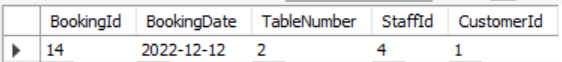

##### Task 3
For the third and final task, Little Lemon need you to create a new procedure called CancelBooking that they can use to cancel or remove a booking.

The procedure should have one input parameter in the form of booking id. You must also write a DELETE statement inside the procedure. 

```
CREATE PROCEDURE CancelBooking(IN bookingId INT)
DELETE FROM `bookings` 
WHERE BookingId = bookingId;

CALL CancelBooking(14);

SELECT * FROM `bookings` WHERE BookingId = 14;
```

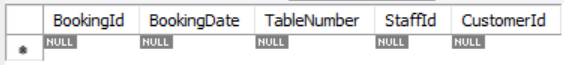